#AH2179 Final Project: Public Transport Arrival Time Prediction

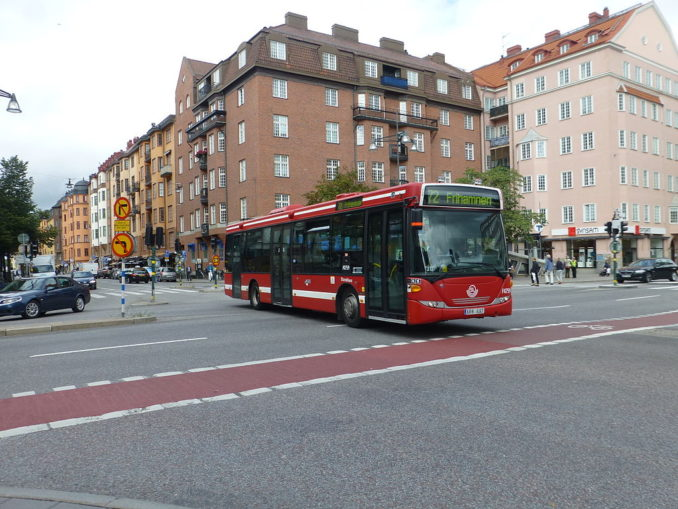



© Leif Jørgensen/Wikimedia Commons

## Descriptive analysis

### Analyze the bus operation data and understand the current bus arrival delay patterns in both time and space (e.g., using descriptive statistics, graphs, and histograms).

In [ ]:
import pandas as pd

# Define the URL from which to fetch the CSV data.
url = 'https://raw.githubusercontent.com/zhenliangma/Applied-AI-in-Transportation/master/ProjectAssignmentData/Dataset-PT.csv'

# Use pandas to read the CSV data from the specified URL and store it in a DataFrame 'df'.
df_origin= pd.read_csv(url,skiprows=1)

pd.set_option('display.max_columns', None)
df_origin.head(10)

,Calendar_date,route_id,bus_id,stop_sequence,arrival_delay,dwell_time,travel_time_for_previous_section,scheduled_travel_time,upstream_stop_delay,origin_delay,previous_bus_delay,previous_trip_travel_time,traffic_condition,recurrent_delay,weather,temperature,day_of_week,time_of_day,factor(weather)Light_Rain,factor(weather)Light_Snow,factor(weather)Normal,factor(weather)Rain,factor(weather)Snow,factor(temperature)Cold,factor(temperature)Extra_cold,factor(temperature)Normal,factor(day_of_week)weekday,factor(day_of_week)weekend,factor(time_of_day)Afternoon_peak,factor(time_of_day)Morning_peak,factor(time_of_day)Off-peak
0,20220108,4,41344,1,151,0,0,120,100,100,160,216,168.666667,161.25,Light Snow,Normal,weekend,OP,0,1,0,0,0,0,0,1,0,1,0,0,1
1,20220108,4,41344,2,185,24,171,45,151,100,198,47,46.333333,36.50,Light Snow,Normal,weekend,OP,0,1,0,0,0,0,0,1,0,1,0,0,1
2,20220108,4,41344,3,186,0,55,41,185,100,189,32,36.666667,34.00,Light Snow,Normal,weekend,OP,0,1,0,0,0,0,0,1,0,1,0,0,1
3,20220108,4,41344,4,202,12,42,94,186,100,200,89,88.000000,87.00,Light Snow,Normal,weekend,OP,0,1,0,0,0,0,0,1,0,1,0,0,1
4,20220108,4,41344,5,242,21,98,86,202,100,256,123,102.000000,88.75,Light Snow,Normal,weekend,OP,0,1,0,0,0,0,0,1,0,1,0,0,1
5,20220108,4,41344,6,260,13,105,38,242,100,255,37,35.000000,37.25,Light Snow,Normal,weekend,OP,0,1,0,0,0,0,0,1,0,1,0,0,1
6,20220108,4,41344,7,278,12,43,79,260,100,238,62,73.000000,69.25,Light Snow,Normal,weekend,OP,0,1,0,0,0,0,0,1,0,1,0,0,1
7,20220108,4,41344,8,272,8,85,97,278,100,213,72,83.333333,72.50,Light Snow,Normal,weekend,OP,0,1,0,0,0,0,0,1,0,1,0,0,1
8,20220108,4,41344,9,292,24,83,47,272,100,210,30,37.666667,33.50,Light Snow,Normal,weekend,OP,0,1,0,0,0,0,0,1,0,1,0,0,1
9,20220108,4,41344,10,351,9,43,85,292,100,240,115,121.000000,105.25,Light Snow,Normal,weekend,OP,0,1,0,0,0,0,0,1,0,1,0,0,1


In [ ]:
df_origin.shape

(545103, 31)

In [ ]:
df_origin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545103 entries, 0 to 545102
Data columns (total 31 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Calendar_date                      545103 non-null  int64  
 1   route_id                           545103 non-null  int64  
 2   bus_id                             545103 non-null  int64  
 3   stop_sequence                      545103 non-null  int64  
 4   arrival_delay                      545103 non-null  int64  
 5   dwell_time                         545103 non-null  int64  
 6   travel_time_for_previous_section   545103 non-null  int64  
 7   scheduled_travel_time              545103 non-null  int64  
 8   upstream_stop_delay                545103 non-null  int64  
 9   origin_delay                       545103 non-null  int64  
 10  previous_bus_delay                 545103 non-null  int64  
 11  previous_trip_travel_time          5451

### We have encoded weather, temperature, day of week, and time of day using the one-hot encoding method. So we dropped the initial columns.

In [ ]:
columns_to_drop = ['weather', 'temperature', 'day_of_week', 'time_of_day']
df = df_origin.drop(columns=columns_to_drop)
df.head(10)

,Calendar_date,route_id,bus_id,stop_sequence,arrival_delay,dwell_time,travel_time_for_previous_section,scheduled_travel_time,upstream_stop_delay,origin_delay,previous_bus_delay,previous_trip_travel_time,traffic_condition,recurrent_delay,factor(weather)Light_Rain,factor(weather)Light_Snow,factor(weather)Normal,factor(weather)Rain,factor(weather)Snow,factor(temperature)Cold,factor(temperature)Extra_cold,factor(temperature)Normal,factor(day_of_week)weekday,factor(day_of_week)weekend,factor(time_of_day)Afternoon_peak,factor(time_of_day)Morning_peak,factor(time_of_day)Off-peak
0,20220108,4,41344,1,151,0,0,120,100,100,160,216,168.666667,161.25,0,1,0,0,0,0,0,1,0,1,0,0,1
1,20220108,4,41344,2,185,24,171,45,151,100,198,47,46.333333,36.50,0,1,0,0,0,0,0,1,0,1,0,0,1
2,20220108,4,41344,3,186,0,55,41,185,100,189,32,36.666667,34.00,0,1,0,0,0,0,0,1,0,1,0,0,1
3,20220108,4,41344,4,202,12,42,94,186,100,200,89,88.000000,87.00,0,1,0,0,0,0,0,1,0,1,0,0,1
4,20220108,4,41344,5,242,21,98,86,202,100,256,123,102.000000,88.75,0,1,0,0,0,0,0,1,0,1,0,0,1
5,20220108,4,41344,6,260,13,105,38,242,100,255,37,35.000000,37.25,0,1,0,0,0,0,0,1,0,1,0,0,1
6,20220108,4,41344,7,278,12,43,79,260,100,238,62,73.000000,69.25,0,1,0,0,0,0,0,1,0,1,0,0,1
7,20220108,4,41344,8,272,8,85,97,278,100,213,72,83.333333,72.50,0,1,0,0,0,0,0,1,0,1,0,0,1
8,20220108,4,41344,9,292,24,83,47,272,100,210,30,37.666667,33.50,0,1,0,0,0,0,0,1,0,1,0,0,1
9,20220108,4,41344,10,351,9,43,85,292,100,240,115,121.000000,105.25,0,1,0,0,0,0,0,1,0,1,0,0,1


In [ ]:
print("\nColumn Statistics:")
print(df.describe())


Column Statistics:
       Calendar_date  route_id         bus_id  stop_sequence  arrival_delay  \
count   5.451030e+05  545103.0  545103.000000  545103.000000  545103.000000   
mean    2.022036e+07       4.0   42960.801278      14.000000     134.972238   
std     1.600773e+02       0.0    1707.986641       7.788888     193.899487   
min     2.022011e+07       4.0   41343.000000       1.000000   -3493.000000   
25%     2.022022e+07       4.0   41364.000000       7.000000      11.000000   
50%     2.022033e+07       4.0   41731.000000      14.000000      88.000000   
75%     2.022051e+07       4.0   44413.000000      21.000000     209.000000   
max     2.022063e+07       4.0   45808.000000      27.000000    2257.000000   

          dwell_time  travel_time_for_previous_section  scheduled_travel_time  \
count  545103.000000                     545103.000000          545103.000000   
mean       31.994665                         71.440968             105.918404   
std        27.215700     

**How many different buses（unique bus_id）are there every day?**

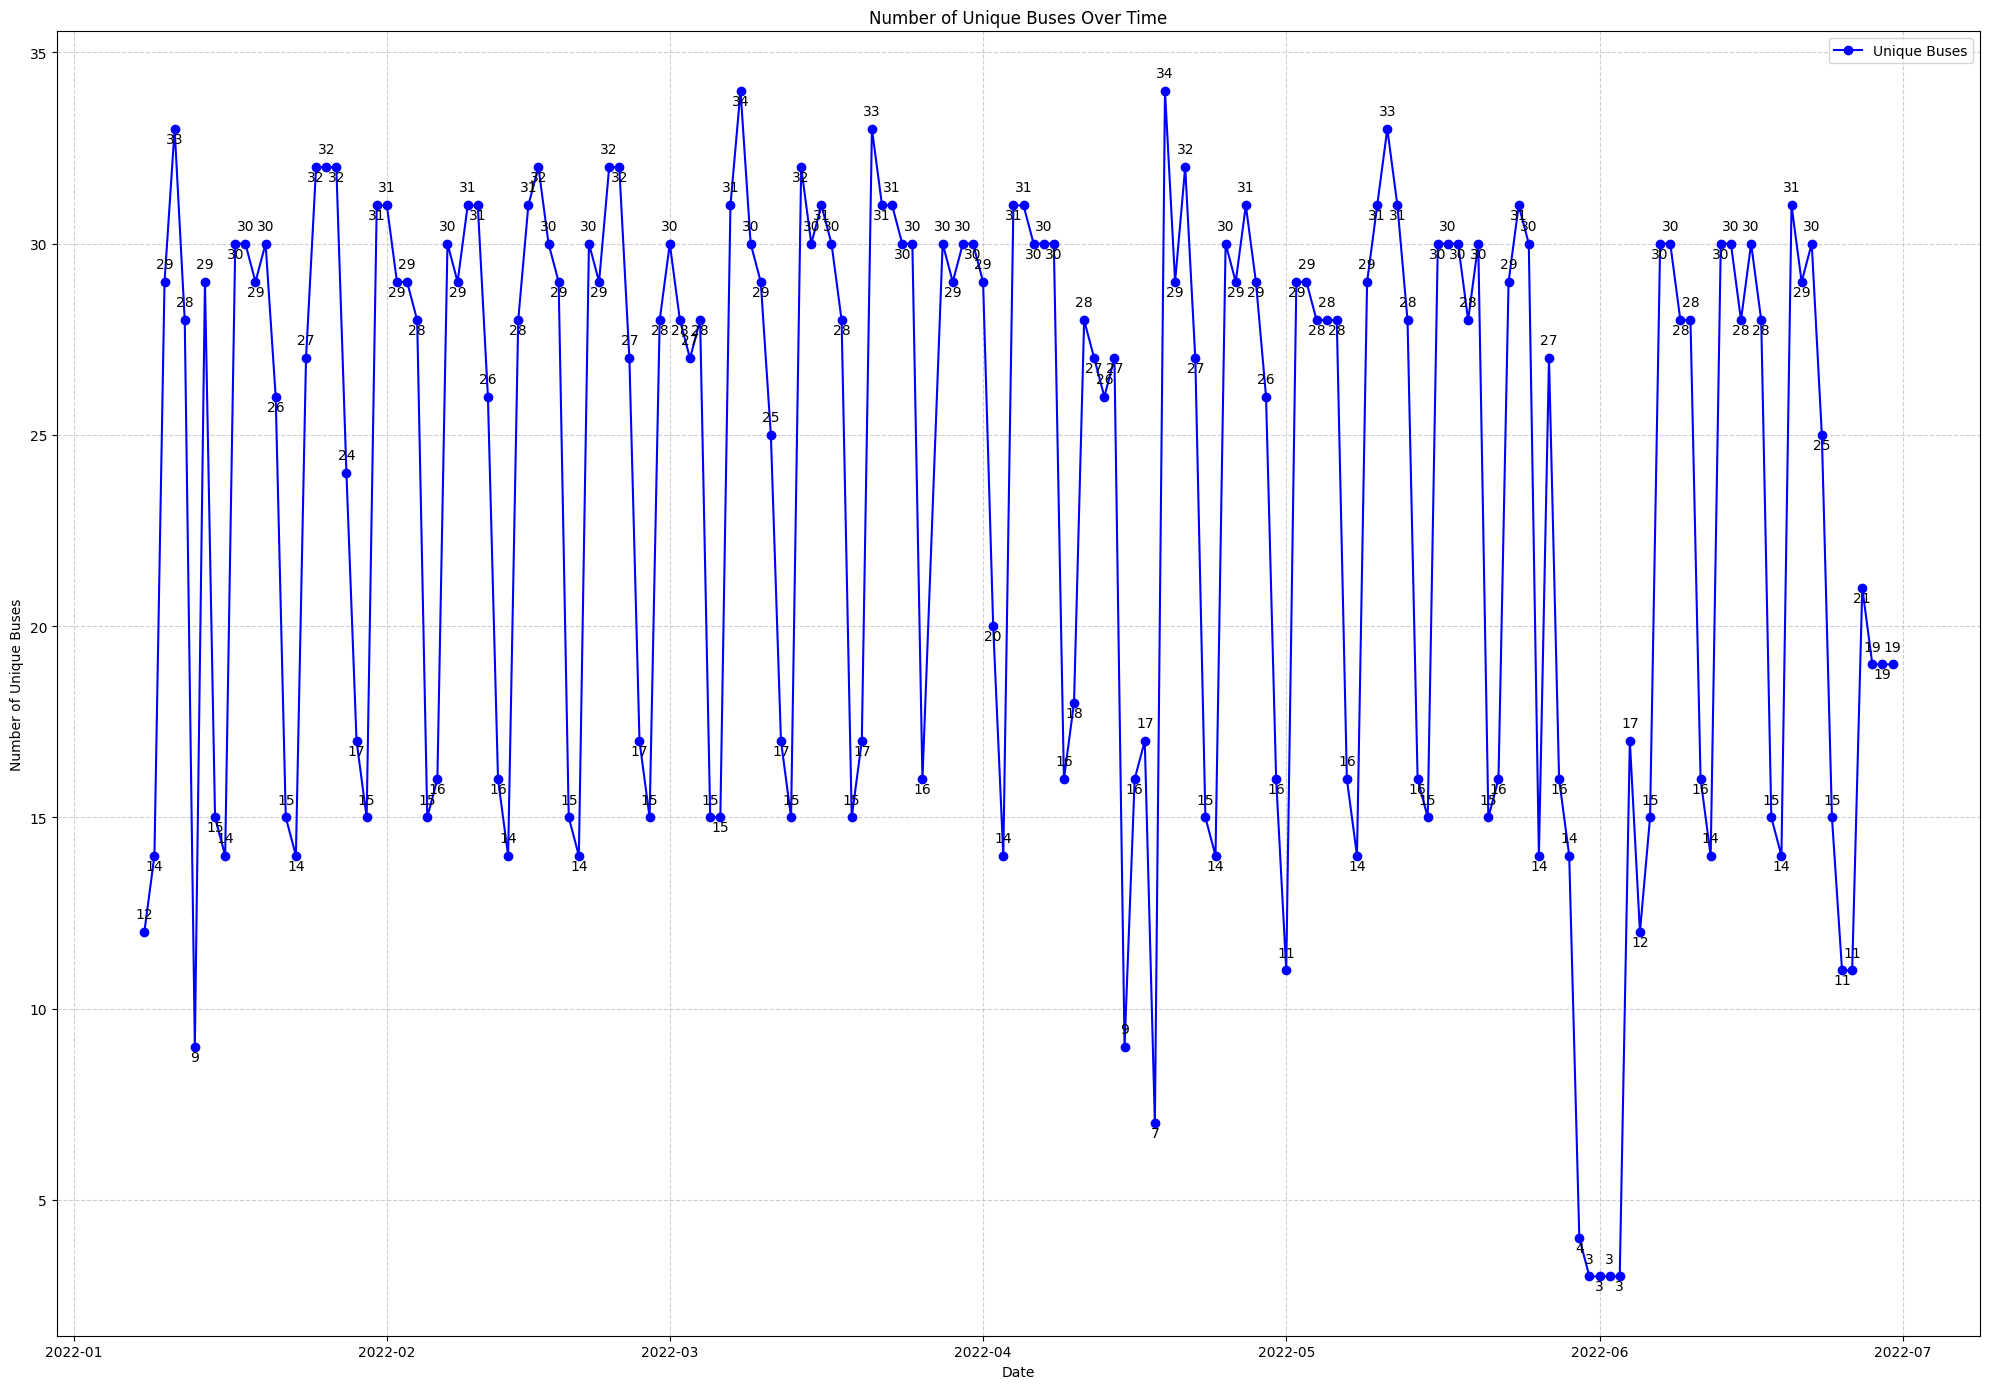

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Convert 'Calendar_date' to datetime format
df['Calendar_date'] = pd.to_datetime(df['Calendar_date'], format='%Y%m%d')
unique_bus_count_per_day = df.groupby('Calendar_date')['bus_id'].nunique()

# Create a line chart to visualize the changes over time
fig, ax = plt.subplots(figsize=(20, 14))

# Line chart
ax.plot(unique_bus_count_per_day.index, unique_bus_count_per_day.values, marker='o', linestyle='-', color='b', label='Unique Buses')

# Scatter plot for unique bus count on specific dates
unique_dates = unique_bus_count_per_day.index
unique_counts = unique_bus_count_per_day.values

# Stagger annotations above and below the points
for i, txt in enumerate(unique_counts):
    if i % 2 == 0:
        ax.annotate(txt, (unique_dates[i], unique_counts[i]), textcoords='offset points', xytext=(0, 10), ha='center')
    else:
        ax.annotate(txt, (unique_dates[i], unique_counts[i]), textcoords='offset points', xytext=(0, -10), ha='center')

ax.set_title('Number of Unique Buses Over Time')
ax.set_xlabel('Date')
ax.set_ylabel('Number of Unique Buses')
ax.grid(True, linestyle='--', alpha=0.6)
ax.legend(loc='upper right')

plt.tight_layout()
plt.show()



<Figure size 2400x1000 with 0 Axes>

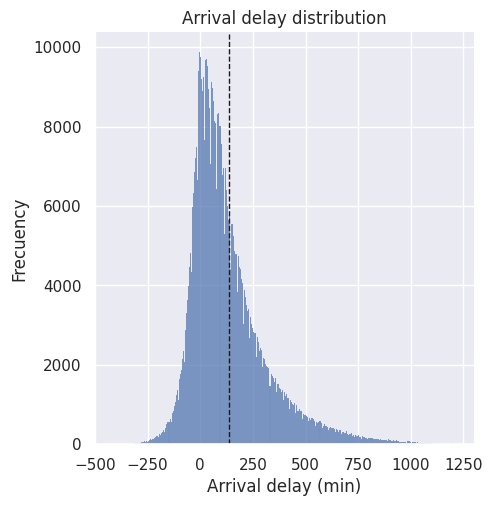

<Figure size 2400x1000 with 0 Axes>

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set()
#sns.histplot(x=df['arrival_delay'])
#plt.xlim(-500, 1300)
#plt.figure(figsize=(24, 10))  # Adjust the figsize as needed (width, height)
#plt.show()

sns.displot(df['arrival_delay'])
plt.title('Arrival delay distribution')
plt.axvline(df['arrival_delay'].mean(), color='k', linestyle='dashed', linewidth=1)
plt.xlabel('Arrival delay (min)')
plt.ylabel('Frecuency')
plt.xlim(-500, 1300)
plt.figure(figsize=(24, 10))  # Adjust the figsize as needed (width, height)


In [ ]:
daily_mean_delay = df.groupby(df['Calendar_date'].dt.date)['arrival_delay'].mean()

plt.figure(figsize=(12, 6))  # Set the figure size
sns.lineplot(x=daily_mean_delay.index, y=daily_mean_delay.values)
plt.xlabel('Date')
plt.ylabel('Average Arrival Delay')
plt.title('Daily Average Arrival Delay')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Ensure tight layout
plt.show()

AttributeError: ignored

<ipython-input-8-e60294798946>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.drop(columns=['route_id','bus_id','arrival_delay']).corr()


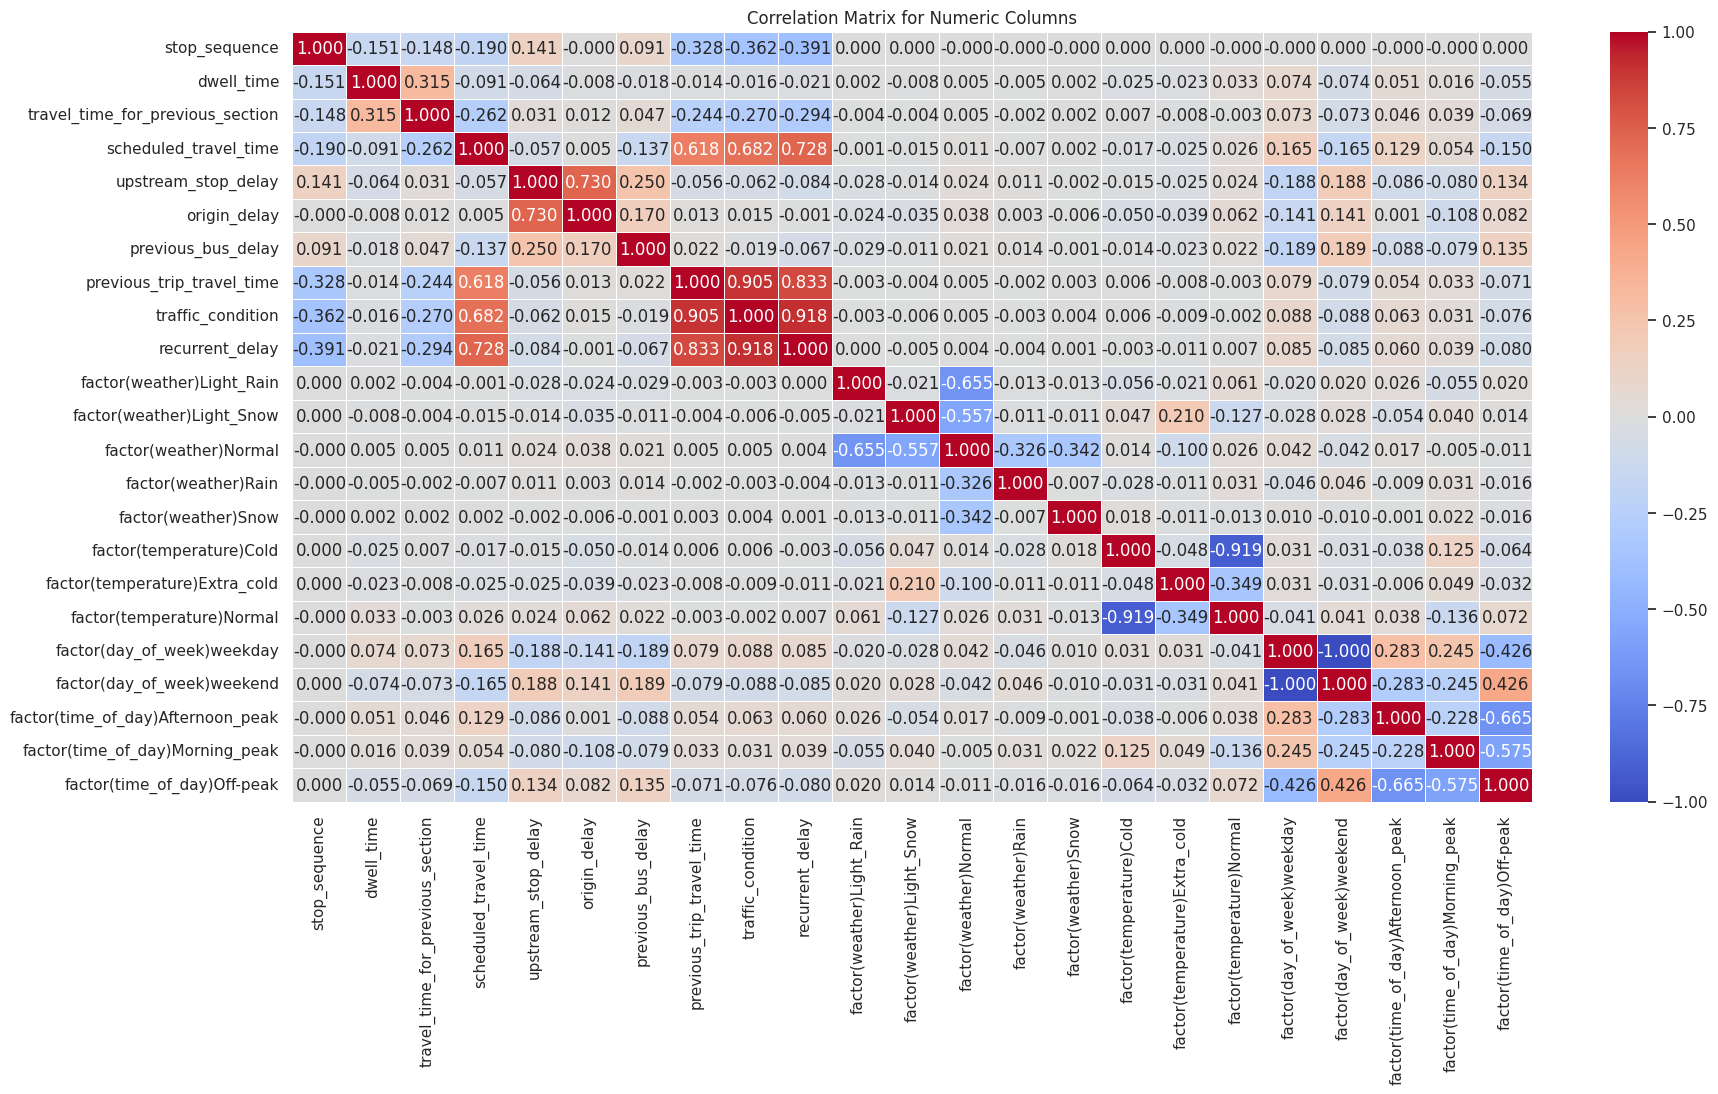

In [ ]:
import seaborn as sns
correlation_matrix = df.drop(columns=['route_id','bus_id','arrival_delay']).corr()
correlation_matrix = correlation_matrix.round(3)
plt.figure(figsize=(20, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".3f", linewidths=0.5)
plt.title('Correlation Matrix for Numeric Columns')
plt.show()

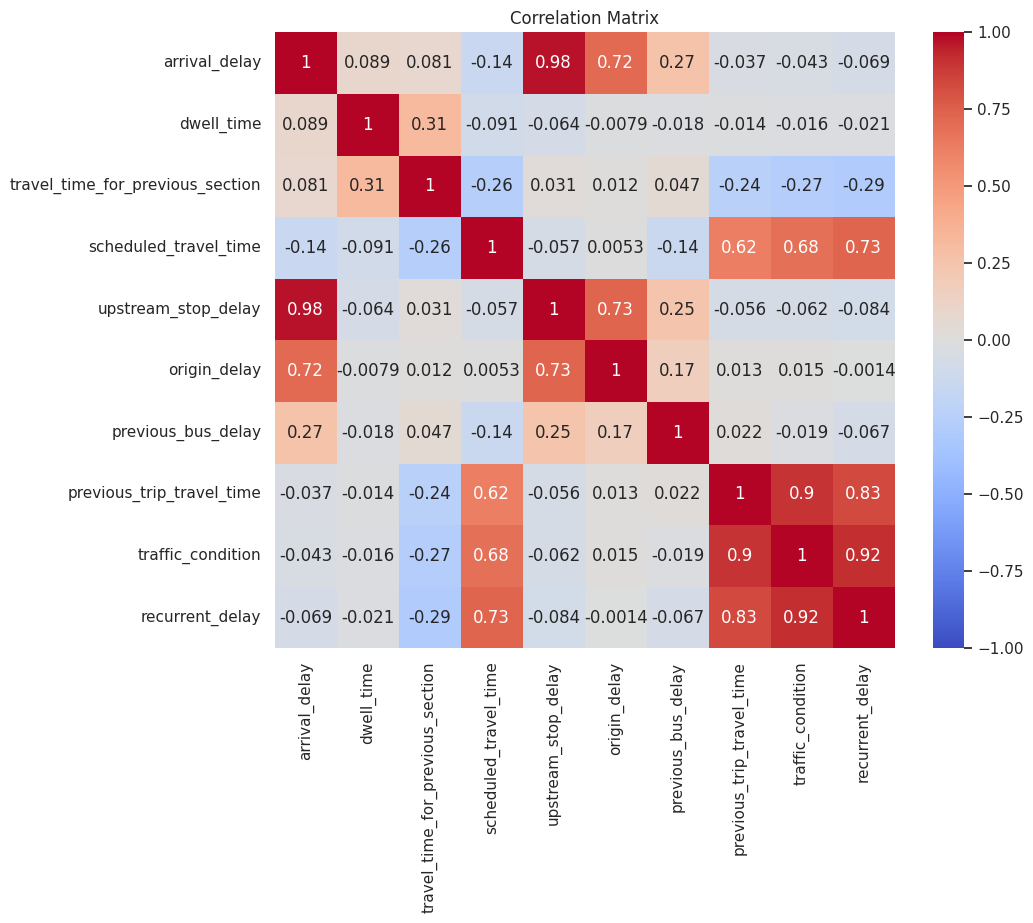

In [ ]:
correlation_matrix = df[["arrival_delay","dwell_time","travel_time_for_previous_section","scheduled_travel_time","upstream_stop_delay","origin_delay","previous_bus_delay","previous_trip_travel_time","traffic_condition","recurrent_delay"]].corr()

plt.figure(figsize=(10, 8))  # Set figure size for better visualization
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

In [ ]:
correlation_matrix['arrival_delay'].sort_values(ascending=False)

arrival_delay                       1.000000
upstream_stop_delay                 0.975019
origin_delay                        0.716324
previous_bus_delay                  0.265434
dwell_time                          0.089433
travel_time_for_previous_section    0.081113
previous_trip_travel_time          -0.036870
traffic_condition                  -0.043104
recurrent_delay                    -0.069122
scheduled_travel_time              -0.142228
Name: arrival_delay, dtype: float64

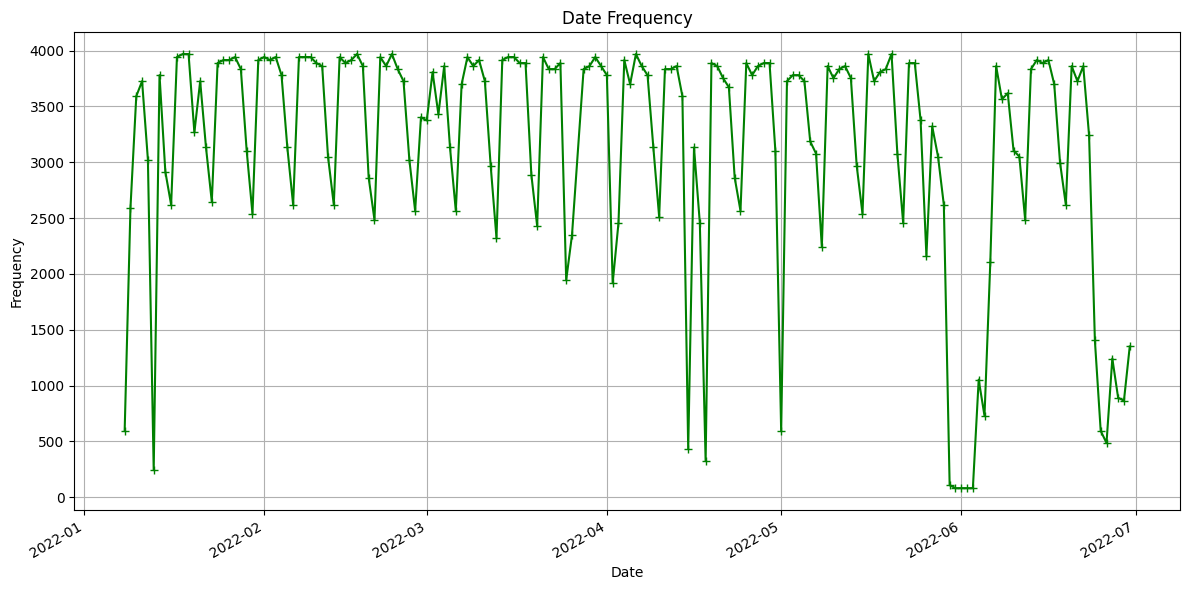

In [ ]:
dates = pd.to_datetime(df['Calendar_date'], format='%Y%m%d')

date_frequency = dates.value_counts().sort_index() #calculates the frequency of each unique date in the 'dates' series

plt.figure(figsize=(12, 6))
date_frequency.plot(kind='line', linestyle='-', marker='+',color='green')
plt.title("Date Frequency")
plt.xlabel("Date")
plt.ylabel("Frequency")
plt.grid(True)
plt.tight_layout()
plt.show()

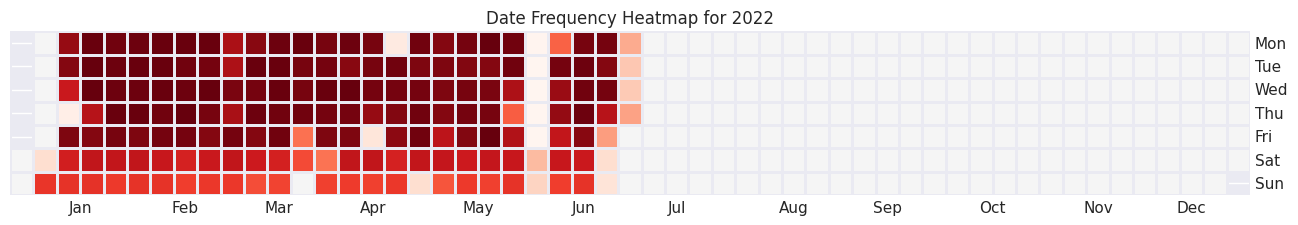

In [ ]:
!pip install calmap
import calmap
import matplotlib.pyplot as plt
plt.figure(figsize=(16, 10))
calmap.yearplot(date_frequency, year=2022)
plt.title("Date Frequency Heatmap for 2022")
plt.show()

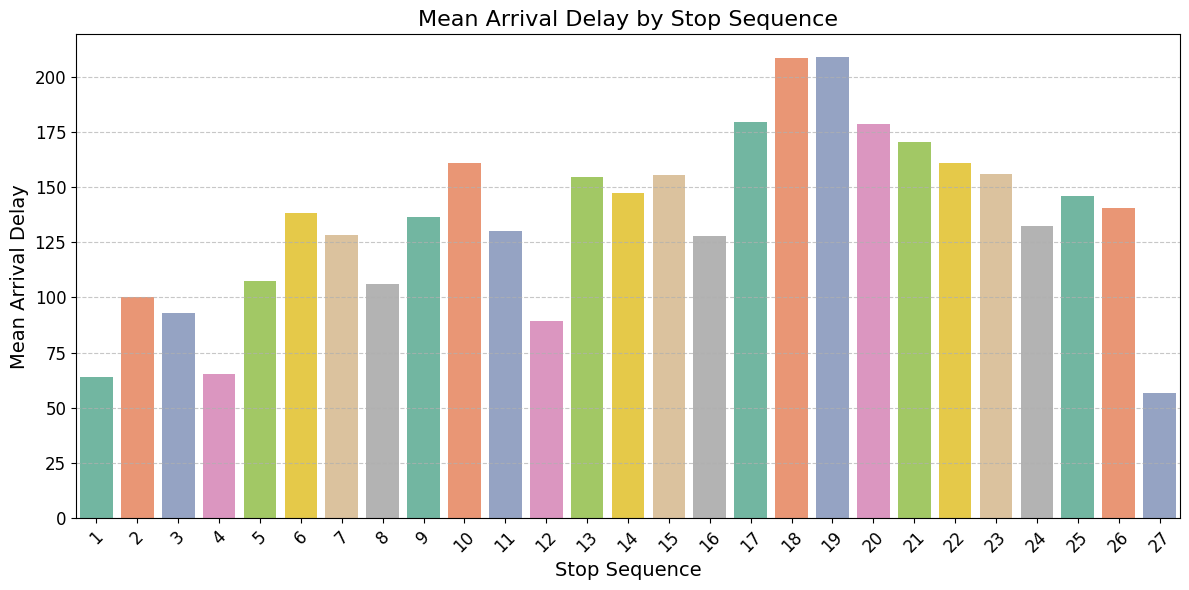

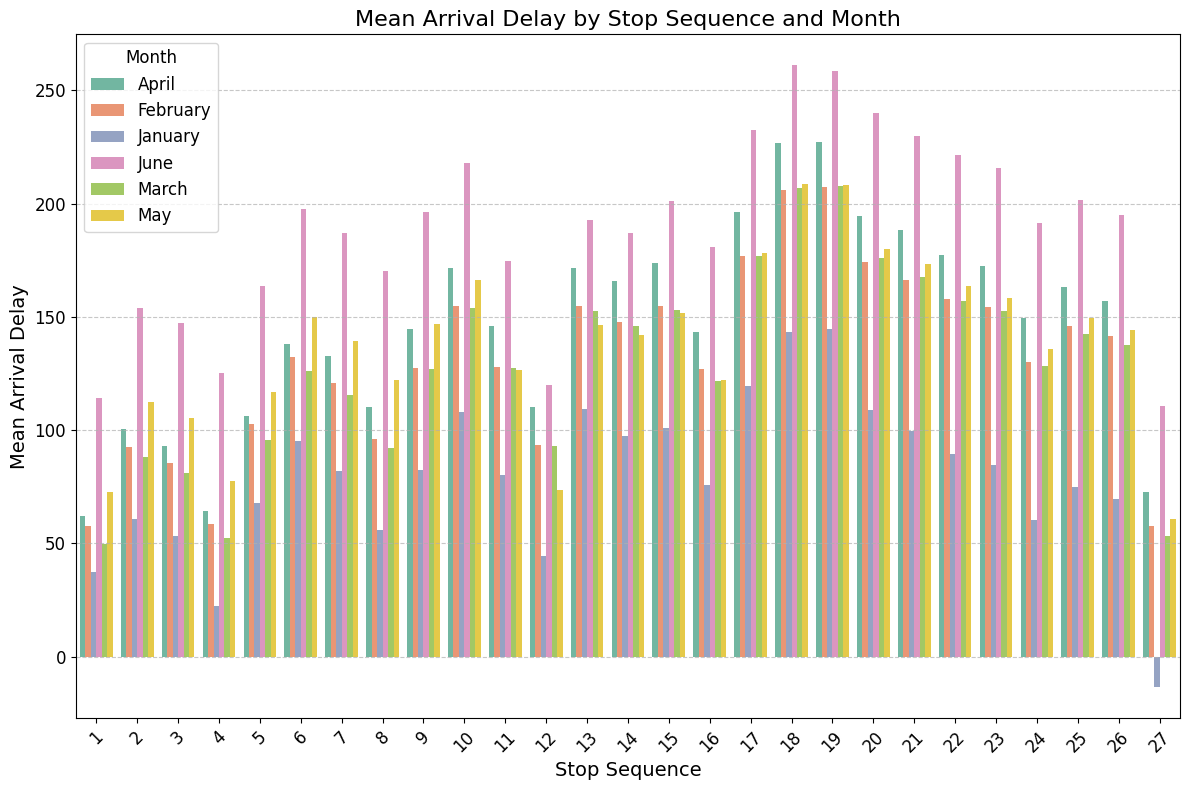

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'Calendar_date' is a column in your DataFrame 'df'
# Convert the 'Calendar_date' column to datetime format
df['Calendar_date'] = pd.to_datetime(df['Calendar_date'], format='%Y%m%d')

# Create a bar plot to visualize mean arrival delay at each stop_sequence
plt.figure(figsize=(12, 6))  # Set the figure size

# Group the data by 'stop_sequence' and calculate the mean arrival delay for each stop_sequence
mean_delay_by_stop = df.groupby('stop_sequence')['arrival_delay'].mean()

# Use a bar plot to visualize mean arrival delay by stop_sequence with the "Set2" palette
sns.barplot(x=mean_delay_by_stop.index, y=mean_delay_by_stop.values, palette='Set2')

# Customize axis labels, title, and ticks
plt.xlabel('Stop Sequence', fontsize=14)
plt.ylabel('Mean Arrival Delay', fontsize=14)
plt.title('Mean Arrival Delay by Stop Sequence', fontsize=16)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)

# Add grid lines
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()  # Ensure tight layout

# Create a new column for the month
df['Month'] = df['Calendar_date'].dt.month_name()

# Group the data by 'stop_sequence' and 'Month' and calculate the mean arrival delay
mean_delay_by_stop_month = df.groupby(['stop_sequence', 'Month'])['arrival_delay'].mean().reset_index()

# Create a bar plot to visualize mean arrival delay by stop_sequence and month
plt.figure(figsize=(12, 8))  # Set the figure size

# Use a bar plot with 'hue' to differentiate by month and the "Set2" palette
sns.barplot(x='stop_sequence', y='arrival_delay', hue='Month', data=mean_delay_by_stop_month, palette='Set2')

# Customize axis labels, title, and ticks
plt.xlabel('Stop Sequence', fontsize=14)
plt.ylabel('Mean Arrival Delay', fontsize=14)
plt.title('Mean Arrival Delay by Stop Sequence and Month', fontsize=16)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)

# Add grid lines
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add a legend
plt.legend(title='Month', loc='best', fontsize=12, title_fontsize=12)
plt.tight_layout()
plt.show()



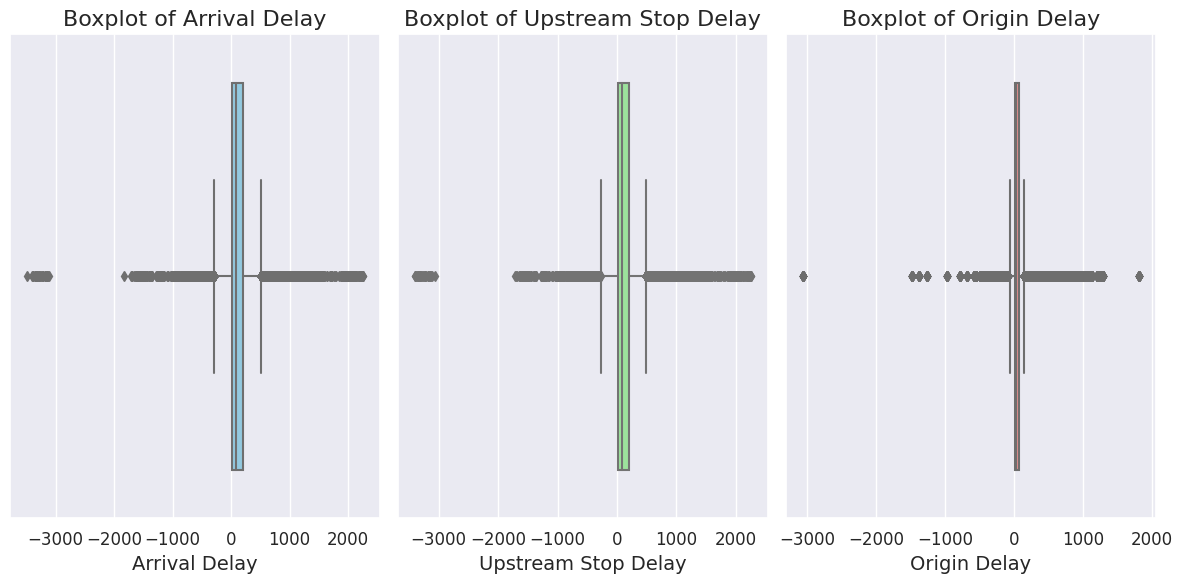

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a boxplot for the 'arrival_delay' column
plt.figure(figsize=(12, 6))  # Set the figure size

# Create a 1x3 grid for subplots
plt.subplot(131)
sns.boxplot(x=df['arrival_delay'], color='skyblue')
plt.xlabel('Arrival Delay', fontsize=14)
plt.title('Boxplot of Arrival Delay', fontsize=16)
plt.xticks(fontsize=12)

# Create a boxplot for the 'upstream_stop_delay' column
plt.subplot(132)
sns.boxplot(x=df['upstream_stop_delay'], color='lightgreen')
plt.xlabel('Upstream Stop Delay', fontsize=14)
plt.title('Boxplot of Upstream Stop Delay', fontsize=16)
plt.xticks(fontsize=12)

# Create a boxplot for the 'origin_delay' column
plt.subplot(133)
sns.boxplot(x=df['origin_delay'], color='lightcoral')
plt.xlabel('Origin Delay', fontsize=14)
plt.title('Boxplot of Origin Delay', fontsize=16)
plt.xticks(fontsize=12)

plt.tight_layout()  # Ensure tight layout
plt.show()

In [ ]:
import pandas as pd

# Calculate the first quartile (Q1)
Q1 = df['arrival_delay'].quantile(0.25)

# Calculate the third quartile (Q3)
Q3 = df['arrival_delay'].quantile(0.75)

# Calculate the Interquartile Range (IQR)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Count the number of outliers
outliers_count = ((df['arrival_delay'] < lower_bound) | (df['arrival_delay'] > upper_bound)).sum()

print("Number of outliers:", outliers_count)

Number of outliers: 28835


In [ ]:
df_origin.groupby('weather')['arrival_delay'].describe()

,count,mean,std,min,25%,50%,75%,max
weather,,,,,,,,
Light Rain,13338.0,101.520843,154.034340,-322.0,1.0,66.0,164.75,1025.0
Light Snow,9720.0,116.779733,144.641747,-364.0,17.0,83.0,190.00,778.0
Normal,514971.0,136.034216,195.699613,-3493.0,11.0,89.0,210.00,2257.0
Rain,3375.0,161.584593,187.168419,-251.0,27.0,117.0,257.00,810.0
Snow,3699.0,131.268992,174.475820,-242.0,13.0,82.0,196.00,924.0


In [ ]:
df_origin.groupby('temperature')['arrival_delay'].describe()

,count,mean,std,min,25%,50%,75%,max
temperature,,,,,,,,
Cold,61452.0,127.576775,179.402944,-366.0,12.0,88.0,197.0,2210.0
Extra cold,9774.0,99.668304,140.915436,-303.0,8.0,71.0,164.0,937.0
Normal,473877.0,136.659441,196.542981,-3493.0,11.0,88.0,212.0,2257.0


In [ ]:
df_origin.groupby('time_of_day')['arrival_delay'].describe()

,count,mean,std,min,25%,50%,75%,max
time_of_day,,,,,,,,
AP,113751.0,100.254890,186.904289,-1656.0,-12.0,54.0,166.0,1605.0
MP,89883.0,100.345238,177.431529,-3493.0,-2.0,69.0,172.0,2210.0
OP,341469.0,155.652042,197.356115,-1349.0,26.0,105.0,233.0,2257.0


In [ ]:
df_origin.groupby('day_of_week')['arrival_delay'].describe()

,count,mean,std,min,25%,50%,75%,max
day_of_week,,,,,,,,
weekday,418149.0,114.589024,181.190084,-3493.0,2.0,74.0,185.0,2257.0
weekend,126954.0,202.108527,217.768790,-346.0,52.0,139.0,295.0,1456.0


In [ ]:
df_origin.groupby('stop_sequence')['arrival_delay'].describe()

,count,mean,std,min,25%,50%,75%,max
stop_sequence,,,,,,,,
1,20189.0,63.961117,145.566785,-3136.0,-13.0,22.0,86.0,1916.0
2,20189.0,100.140274,150.182380,-3114.0,14.0,60.0,123.0,1894.0
3,20189.0,92.829660,152.244160,-3152.0,5.0,54.0,121.0,1895.0
4,20189.0,65.273961,157.159572,-3159.0,-26.0,29.0,102.0,1887.0
5,20189.0,107.407251,156.259919,-3175.0,15.0,65.0,143.0,2079.0
6,20189.0,138.431671,160.266349,-3148.0,40.0,97.0,180.0,2094.0
7,20189.0,128.251226,164.838097,-3175.0,29.0,88.0,176.0,2050.0
8,20189.0,106.233593,171.644522,-3229.0,1.0,68.0,160.0,2067.0
9,20189.0,136.354797,171.465535,-3211.0,25.0,93.0,191.0,2094.0


### Find out how much influence input variables such as "Upstream_stop_delay" and "Dwell_time" have on the values in the "Arrival_delay" column.

### Feature engineering visually explore and understand the relationships between different features (variables) in a dataset. Seaborn pair plots help identify patterns, correlations, and potential outliers, aiding in the selection and transformation of features to improve model performance. It is a crucial step in data preprocessing to enhance the accuracy and effectiveness of machine learning models.​



## Model formulation



### Formulate bus arrival time prediction problem and justify it by discussing its reasonableness for practical use by passengers and operators. For example,  

1.   What to predict? – Bus arrival delays for next stop
2.   What is the problem type? – Formulate as a regression problem.
3.   What features to use? - All independent variables have an impact on the dependent variable. For example, there will be more delays on weekends, rainy and snowy days, and stations with a longer history mean of delay and a higher previous delay.

---
System operation variables:

1.   Historical
2.   Actual


Environment and time variables
1.   Time of day
2.   Day of week
3.   Weather
4.   Temperature












**Our strategy is not to process the features or only perform basic processing first, and then analyze in detail when the regression results are not good.**There are so many features. In order to avoid over-generalization of the model, we may use various methods to identify the most important indicators in the regression model:

**Feature Selection Methods**: Use correlation analysis/stepwise regression to select variables highly correlated with the target variable or choose the best model based on information criteria like AIC or BIC.

**Feature Engineering:** Create new features or transform existing ones to potentially enhance feature importance.We can use **PCA** and **LDA** for dimensionality reduction.

**L1 Regularization (Lasso Regression):** Apply L1 regularization in linear regression to force some coefficients to become zero, effectively performing feature selection. Adjust the regularization strength to control feature retention.


## Model development


In this section, we tried different regression models to prepare for subsequent
model comparisons. We write **feature engineering** in different model parts because for some models such as linear regression, SVR and neural networks, model performance may be improved when features are normalized. But for other models, such as tree-based models, good performance can be achieved without standardization.


### Linear Regression

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from xgboost import XGBClassifier
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import accuracy_score, precision_score, recall_score,mean_absolute_error
from sklearn.model_selection import cross_val_score
import pandas as pd
import os
import warnings
from sklearn.exceptions import ConvergenceWarning
from sklearn.preprocessing import StandardScaler
warnings.filterwarnings("ignore", category=ConvergenceWarning)
import numpy as np

#Separate variables of the dataset
x_linear = df.drop(['arrival_delay','Calendar_date','Month','route_id','bus_id','stop_sequence'], axis=1)
y_linear = df['arrival_delay']

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the feature data using StandardScaler
x_linear_scaled = scaler.fit_transform(x_linear)

#train and test (20% split)
x_train_linear, x_test_linear, y_train_linear, y_test_linear = train_test_split(x_linear_scaled, y_linear, test_size=0.2,random_state=0)

# Create a object Linear Regression model
linear_model = LinearRegression()

cross_val_score(linear_model, x_linear_scaled, y_linear, cv=5).mean()



0.9887009994353229

In [ ]:
# Fit the model to the training data
linear_model.fit(x_train_linear, y_train_linear)

y_pred_linear = linear_model.predict(x_test_linear)

mae = mean_absolute_error(y_test_linear, y_pred_linear)
mse = mean_squared_error(y_test_linear, y_pred_linear)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_linear, y_pred_linear)

def mean_absolute_percentage_error(y_true, y_pred):
    mask = y_true != 0  # Create a mask where y_true is not zero
    y_true = y_true[mask]
    y_pred = y_pred[mask]
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100 if len(y_true) > 0 else 0  # Check if there are non-zero values in y_true

mape = mean_absolute_percentage_error(y_test_linear, y_pred_linear)

print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R-squared: {r2}")
print(f"Mean Absolute Percentage Error: {mape}%")

Mean Absolute Error: 12.610006646540636
Mean Squared Error: 390.37364024654977
Root Mean Squared Error: 19.757875398092523
R-squared: 0.9896198352169105
Mean Absolute Percentage Error: 42.44606402494682%


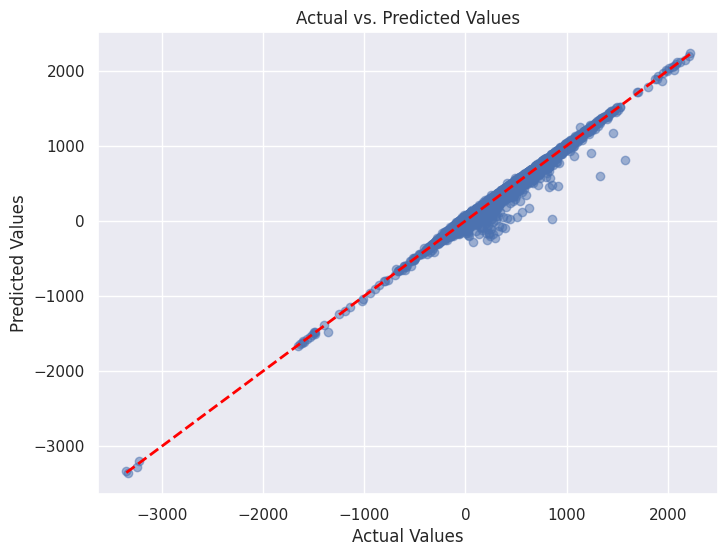

In [ ]:
import matplotlib.pyplot as plt

# y_test contains the actual target values for the test dataset
# y_pred contains the predicted values for the test dataset

# Create a scatter plot to visualize the relationship
plt.figure(figsize=(8, 6))
plt.scatter(y_test_linear, y_pred_linear, alpha=0.5)  # Plot actual vs. predicted values

# Add labels and title
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")

# Add a diagonal line for reference (perfect predictions)
plt.plot([min(y_test_linear), max(y_test_linear)], [min(y_test_linear), max(y_test_linear)], linestyle='--', color='red', lw=2)

# Show the plot
plt.show()

In [ ]:

intercept = linear_model.intercept_
coefficients = linear_model.coef_

variable_names = x_linear.columns

linear_regression_expression = f'y = {intercept:.2f}'
for i in range(len(variable_names)):
    linear_regression_expression += f' + ({coefficients[i]:.2f} * {variable_names[i]})'

print("linear_regression_expression:")
print(linear_regression_expression)

linear_regression_expression:
y = 134.97 + (26.72 * dwell_time) + (0.62 * travel_time_for_previous_section) + (-35.49 * scheduled_travel_time) + (191.31 * upstream_stop_delay) + (-0.53 * origin_delay) + (0.88 * previous_bus_delay) + (1.26 * previous_trip_travel_time) + (7.86 * traffic_condition) + (21.04 * recurrent_delay) + (-18148666381.81 * factor(weather)Light_Rain) + (-15545507585.81 * factor(weather)Light_Snow) + (-26843853002.40 * factor(weather)Normal) + (-9214399048.35 * factor(weather)Rain) + (-9643670912.91 * factor(weather)Snow) + (321892705245.35 * factor(temperature)Cold) + (135059031636.41 * factor(temperature)Extra_cold) + (343027684440.67 * factor(temperature)Normal) + (-10386908006277.82 * factor(day_of_week)weekday) + (-10386908006278.11 * factor(day_of_week)weekend) + (-220170936102.50 * factor(time_of_day)Afternoon_peak) + (-201055480622.38 * factor(time_of_day)Morning_peak) + (-262100142300.53 * factor(time_of_day)Off-peak)


Incorporating ridge and lasso regression models

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from xgboost import XGBClassifier
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score
import pandas as pd
import os
import warnings
from sklearn.exceptions import ConvergenceWarning
from sklearn.preprocessing import StandardScaler
import numpy as np

# Filter convergence warnings
warnings.filterwarnings("ignore", category=ConvergenceWarning)

# Separate variables of the dataset
x_linear = df.drop(['arrival_delay', 'Calendar_date', 'Month', 'route_id', 'bus_id', 'stop_sequence'], axis=1)
y_linear = df['arrival_delay']

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the feature data using StandardScaler
x_linear_scaled = scaler.fit_transform(x_linear)

# Split the data into a training and test set (20% split)
x_train_linear, x_test_linear, y_train_linear, y_test_linear = train_test_split(x_linear_scaled, y_linear, test_size=0.2, random_state=0)

# Create Linear Regression, Ridge, and Lasso models
linear_model = LinearRegression()
ridge_model = Ridge(alpha=2.0)  # You can adjust the alpha (regularization strength)
lasso_model = Lasso(alpha=2.0)  # You can adjust the alpha (regularization strength)

# Create a list of models to iterate through
models = [linear_model, ridge_model, lasso_model]

# Evaluate each model
for model in models:
    # Train the model on the training data
    model.fit(x_train_linear, y_train_linear)

    # Predict on the test set
    y_pred_linear = model.predict(x_test_linear)

    mae = mean_absolute_error(y_test_linear, y_pred_linear)
    mse = mean_squared_error(y_test_linear, y_pred_linear)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test_linear, y_pred_linear)

    def mean_absolute_percentage_error(y_true, y_pred):
        mask = y_true != 0  # Create a mask where y_true is not zero
        y_true = y_true[mask]
        y_pred = y_pred[mask]
        return np.mean(np.abs((y_true - y_pred) / y_true)) * 100 if len(y_true) > 0 else 0  # Check if there are non-zero values in y_true

    mape = mean_absolute_percentage_error(y_test_linear, y_pred_linear)

    print(f"Model: {model.__class__.__name__}")
    print(f"Mean Absolute Error: {mae}")
    print(f"Mean Squared Error: {mse}")
    print(f"Root Mean Squared Error: {rmse}")
    print(f"R-squared: {r2}")
    print(f"Mean Absolute Percentage Error: {mape}%")
    print()

Model: LinearRegression
Mean Absolute Error: 12.609493341496748
Mean Squared Error: 390.3720911645887
Root Mean Squared Error: 19.757836196420616
R-squared: 0.9896198764075145
Mean Absolute Percentage Error: 42.44008018101758%

Model: Ridge
Mean Absolute Error: 12.60925160363428
Mean Squared Error: 390.3755896880064
Root Mean Squared Error: 19.757924731307345
R-squared: 0.9896197833806145
Mean Absolute Percentage Error: 42.44068336241764%

Model: Lasso
Mean Absolute Error: 13.715838561192536
Mean Squared Error: 430.53229995248824
Root Mean Squared Error: 20.74927227525072
R-squared: 0.9885520031139222
Mean Absolute Percentage Error: 44.50112840345257%



Although the parameters of the latter classification indicators are a bit strange, there is an interaction between the classification indicators, which means that their effects may interact in the model, resulting in the classification indicators not having an excessive impact in linear regression. In this case, the model can perform well without suffering from high coefficient values ​​due to the influence of categorical variables.

### Polynomial Regression:


In [ ]:
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, precision_score, recall_score,mean_absolute_error
from sklearn.preprocessing import StandardScaler
import numpy as np
#Separate variables of the dataset
x_poly = df.drop(['arrival_delay','Calendar_date','Month','route_id','bus_id','stop_sequence'], axis=1)
y_poly = df['arrival_delay']

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the feature data using StandardScaler
x_poly_scaled = scaler.fit_transform(x_poly)

# Split the data into training and testing sets
x_train_poly, x_test_poly, y_train_poly, y_test_poly = train_test_split(x_poly_scaled, y_poly, test_size=0.2, random_state=0)

# Defining the degree of the polynomial
degree = 2 #Session crashed if try degree 3

# Create polynomial features
poly_features = PolynomialFeatures(degree=degree)
x_train_poly = poly_features.fit_transform(x_train_poly)
x_test_poly = poly_features.transform(x_test_poly)

# Create a polynomial regression model
poly_reg = LinearRegression()

# Fit the model to the training data
poly_reg.fit(x_train_poly, y_train_poly)

# Make predictions on the test data
y_pred_poly = poly_reg.predict(x_test_poly)

# Evaluate the model
mae = mean_absolute_error(y_test_poly, y_pred_poly)
mse = mean_squared_error(y_test_poly, y_pred_poly)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_poly, y_pred_poly)

cross_val_score(linear_model, x_poly_scaled, y_poly, cv=5).mean()

def mean_absolute_percentage_error(y_true, y_pred):
    mask = y_true != 0  # Create a mask where y_true is not zero
    y_true = y_true[mask]
    y_pred = y_pred[mask]
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100 if len(y_true) > 0 else 0  # Check if there are non-zero values in y_true

mape = mean_absolute_percentage_error(y_test_poly, y_pred_poly)

print(f"Cross validation score: {cross_val_score(linear_model, x_poly_scaled, y_poly, cv=5).mean()}")
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R-squared: {r2}")
print(f"Mean Absolute Percentage Error: {mape}%")

Cross validation score: 0.98870084285532
Mean Absolute Error: 12.5347648313599
Mean Squared Error: 382.7488487959772
Root Mean Squared Error: 19.563968124999008
R-squared: 0.98982258095467
Mean Absolute Percentage Error: 42.162841040342734%


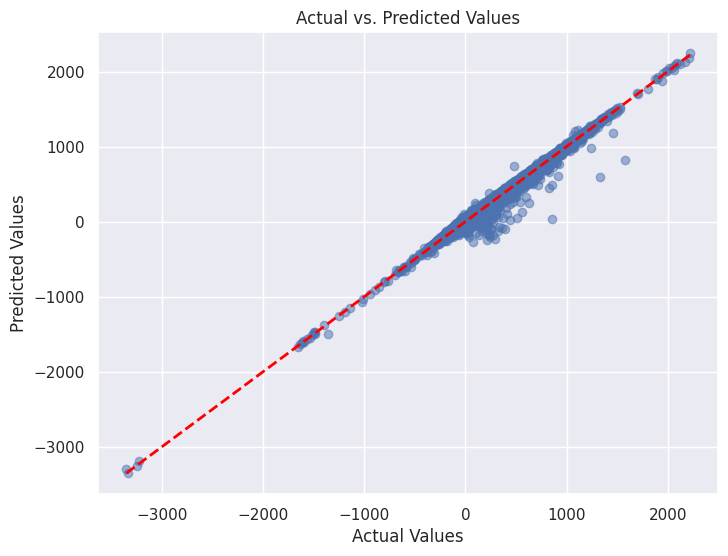

In [ ]:
import matplotlib.pyplot as plt

# y_test contains the actual target values for the test dataset
# y_pred contains the predicted values for the test dataset

# Create a scatter plot to visualize the relationship
plt.figure(figsize=(8, 6))
plt.scatter(y_test_poly, y_pred_poly, alpha=0.5)  # Plot actual vs. predicted values

# Add labels and title
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")

# Add a diagonal line for reference (perfect predictions)
plt.plot([min(y_test_poly), max(y_test_poly)], [min(y_test_poly), max(y_test_poly)], linestyle='--', color='red', lw=2)

# Show the plot
plt.show()

In [ ]:
# Get the coefficients of the polynomial regression model
coefficients = poly_reg.coef_

# Get the intercept of the polynomial regression model
intercept = poly_reg.intercept_

# Print the coefficients
print("Coefficients (Theta_1, Theta_2, ... Theta_n):", coefficients)

# Print the intercept
print("Intercept (Theta_0):", intercept)


Coefficients (Theta_1, Theta_2, ... Theta_n): [ 1.19642145e+06  2.64920872e+01  5.96492369e-01 -3.53392416e+01
  1.91438169e+02 -5.50341358e-01  9.85153095e-01  1.13121488e-01
  5.46383278e+00  2.42303604e+01  1.35847421e+12 -1.34183032e+11
 -1.00742612e+12  4.73949342e+10 -3.37822309e+11 -8.94682498e+11
 -2.61223055e+11  2.49985638e+11 -8.42395454e+11  1.08364050e+12
  1.98365225e+11 -1.14187821e+11 -2.48975871e+11  4.67902277e-02
  8.59867781e-02 -7.62803306e-02 -2.19302283e-01  8.22988591e-02
 -1.78812658e-01 -1.54695470e-01 -2.98807279e-01  2.43627125e-01
 -1.44977648e+11 -1.24182740e+11 -2.14437721e+11 -7.36077171e+10
 -7.70368850e+10 -1.29398731e+10 -5.42928341e+09 -1.37894852e+10
  1.11256879e+11  1.11256879e+11  1.21944096e+11  1.11356791e+11
  1.45167049e+11 -6.40563965e-02  1.16333008e-01  1.72378540e-01
 -2.06298828e-01  2.71095276e-01  1.31683350e-01 -1.13452148e+00
  7.17071533e-01 -6.59197144e+10 -5.64645026e+10 -9.75024328e+10
 -3.34686054e+10 -3.50278097e+10 -1.59201019

### Random Forest

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

df_rf = df.iloc[:10000]
x_rf = df_rf.drop(['arrival_delay','Calendar_date','Month','route_id','bus_id','stop_sequence'], axis=1)
y_rf = df_rf['arrival_delay']

X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(x_rf, y_rf, test_size=0.2, random_state=42)

param_grid = {
     'n_estimators': [100, 200, 300, 400, 500],
     'max_depth': [None, 10, 20, 30],
 }
# Create an XGBoost regressor
RF = RandomForestRegressor()

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=RF, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error',verbose=1)
grid_search.fit(X_train_rf, y_train_rf)
best_params = grid_search.best_params_
print("Best parameters:", best_params)

# Create a RandomForest Regression model
model_RF= RandomForestRegressor()
model_RF= grid_search.best_estimator_

model_RF.fit(X_train_rf, y_train_rf)

# Fit the model to the training data
model_RF.fit(X_train_rf, y_train_rf)

y_pred_rf = model_RF.predict(X_test_rf)

mae_rf = mean_absolute_error(y_test_rf, y_pred_rf)
mse_rf = mean_squared_error(y_test_rf, y_pred_rf)
r2_rf = r2_score(y_test_rf, y_pred_rf)

print(f"Mean Absolute Error: {mae_rf}")
print(f"Mean Squared Error: {mse_rf}")
print(f"R-squared: {r2_rf}")

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best parameters: {'max_depth': 30, 'n_estimators': 500}
Mean Absolute Error: 33.4452605330628
Mean Squared Error: 1937.5154094899451
R-squared: 0.8990269437114803


### XGBoost

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

df_xgboost = df.copy()
#df.iloc[:10000]

x_xgboost = df_xgboost.drop(['arrival_delay','Calendar_date','Month','route_id','bus_id','stop_sequence'], axis=1)
y_xgboost = df_xgboost['arrival_delay']

X_train_xgboost, X_test_xgboost, y_train_xgboost, y_test_xgboost = train_test_split(x_xgboost, y_xgboost, test_size=0.2, random_state=4)
param_grid = {'n_estimators': [50, 100, 200, 300, 400, 500],
            'max_depth': [3, 4, 5, 6, 7],
             'learning_rate': [0.01, 0.05, 0.07, 0.1, 0.2]}

# # Create an XGBoost regressor
xgb = XGBRegressor()

# # Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train_xgboost, y_train_xgboost)

best_params = grid_search.best_params_
print("Best parameters:", best_params)

# Retrieve the best cross-validated negative mean squared error (MSE)
best_score = grid_search.best_score_
print("Best accuracy:", best_score)

# Create a XGBoost Regression model
model_Boost= XGBRegressor()

model_Boost= grid_search.best_estimator_

# Fit the model to the training data
model_Boost.fit(X_train_xgboost, y_train_xgboost)

y_pred_xgboost = model_Boost.predict(X_test_xgboost)


Best parameters: {'learning_rate': 0.05, 'max_depth': 7, 'n_estimators': 300}
Best accuracy: -839.1550501473891


In [ ]:

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae_xgboost = mean_absolute_error(y_test_xgboost, y_pred_xgboost)
mse_xgboost = mean_squared_error(y_test_xgboost, y_pred_xgboost)
r2_xgboost = r2_score(y_test_xgboost, y_pred_xgboost)
rmse = np.sqrt(mse)

def mean_absolute_percentage_error(y_true, y_pred):
    mask = y_true != 0  # Create a mask where y_true is not zero
    y_true = y_true[mask]
    y_pred = y_pred[mask]
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100 if len(y_true) > 0 else 0  # Check if there are non-zero values in y_true

mape = mean_absolute_percentage_error(y_test_xgboost, y_pred_xgboost)

print(f"Mean Absolute Error: {mae_xgboost}")
print(f"Mean Squared Error: {mse_xgboost}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R-squared: {r2}")
print(f"Mean Absolute Percentage Error: {mape}%")

Mean Absolute Error: 13.572552862412012
Mean Squared Error: 770.1790777885711
Root Mean Squared Error: 19.75792613092636
R-squared: 0.9896197819099795
Mean Absolute Percentage Error: 41.70581122433321%


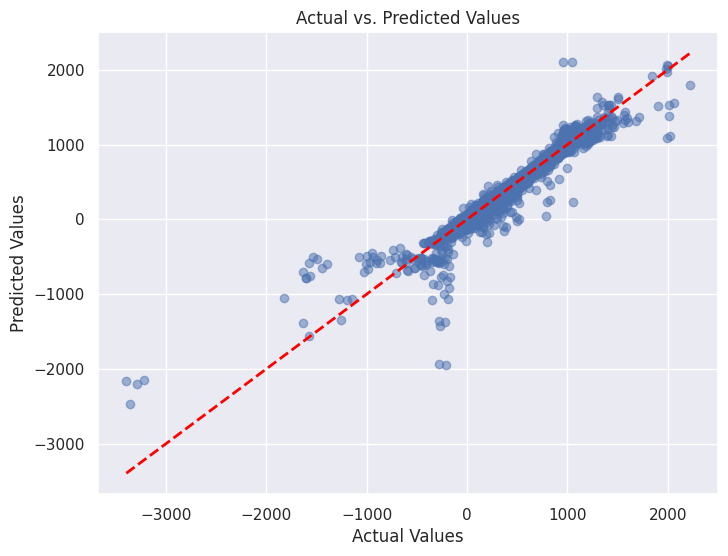

In [ ]:
import matplotlib.pyplot as plt

# y_test contains the actual target values for the test dataset
# y_pred contains the predicted values for the test dataset

# Create a scatter plot to visualize the relationship
plt.figure(figsize=(8, 6))
plt.scatter(y_test_xgboost, y_pred_xgboost, alpha=0.5)  # Plot actual vs. predicted values

# Add labels and title
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")

# Add a diagonal line for reference (perfect predictions)
plt.plot([min(y_test_xgboost), max(y_test_xgboost)], [min(y_test_xgboost), max(y_test_xgboost)], linestyle='--', color='red', lw=2)

# Show the plot
plt.show()

### LightGBM

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import os
import warnings
from sklearn.exceptions import ConvergenceWarning

warnings.filterwarnings("ignore", category=ConvergenceWarning)
#df_lgb = df.copy() # total time 1h 32m 37s

df_lgb = df.iloc[:100000]

x_lgb = df_lgb.drop(['arrival_delay','Calendar_date','Month','route_id','bus_id','stop_sequence'], axis=1)
y_lgb = df_lgb['arrival_delay']
X_train_lgb, X_test_lgb, y_train_lgb, y_test_lgb = train_test_split(x_lgb, y_lgb, test_size=0.2, random_state=4)
param_grid = {'n_estimators': [50, 100, 200, 400],
            'max_depth': [3, 5, 6, 7, 9,11],
            'learning_rate': [0.01, 0.05, 0.07, 0.1],
            'num_leaves': [31, 63, 127,255]}

# Create an lgb regressor
gbm = LGBMRegressor()

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=gbm, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train_lgb, y_train_lgb)
best_params = grid_search.best_params_
print("Best parameters:", best_params)

# Create a lgb Regression model
model_light= grid_search.best_estimator_

model_light.fit(X_train_lgb, y_train_lgb)

# Fit the model to the training data
model_light.fit(X_train_lgb, y_train_lgb)

y_pred_lgb = model_light.predict(X_test_lgb)

mae_lgb = mean_absolute_error(y_test_lgb, y_pred_lgb)
mse_lgb = mean_squared_error(y_test_lgb, y_pred_lgb)
r2_lgb = r2_score(y_test_lgb, y_pred_lgb)

print(f"Mean Absolute Error: {mae_lgb}")
print(f"Mean Squared Error: {mse_lgb}")
print(f"R-squared: {r2_lgb}")

Streaming output truncated to the last 5000 lines.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with posit

In [ ]:

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae_lgb = mean_absolute_error(y_test_lgb, y_pred_lgb)
mse_lgb = mean_squared_error(y_test_lgb, y_pred_lgb)
r2_lgb = r2_score(y_test_lgb, y_pred_lgb)

print(f"Mean Absolute Error: {mae_lgb}")
print(f"Mean Squared Error: {mse_lgb}")
print(f"R-squared: {r2_lgb}")

Mean Absolute Error: 12.509543809693238
Mean Squared Error: 472.4348824703544
R-squared: 0.9767677265867478


### Try Neural Networks

### Neural Networks

In [ ]:
df_nn=df.copy()
import pandas as pd
columns_to_drop_nn = ['Calendar_date','bus_id','route_id','stop_sequence']
df_nn = df_nn.drop(columns=columns_to_drop_nn)
df_nn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545103 entries, 0 to 545102
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   arrival_delay                      545103 non-null  int64  
 1   dwell_time                         545103 non-null  int64  
 2   travel_time_for_previous_section   545103 non-null  int64  
 3   scheduled_travel_time              545103 non-null  int64  
 4   upstream_stop_delay                545103 non-null  int64  
 5   origin_delay                       545103 non-null  int64  
 6   previous_bus_delay                 545103 non-null  int64  
 7   previous_trip_travel_time          545103 non-null  int64  
 8   traffic_condition                  545103 non-null  float64
 9   recurrent_delay                    545103 non-null  float64
 10  factor(weather)Light_Rain          545103 non-null  int64  
 11  factor(weather)Light_Snow          5451

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Create a Sequential model, which is a linear stack of layers.
model = Sequential()
# Add a Dense layer with 64 units, ReLU activation, and an input dimension of 4.
model.add(Dense(64, activation='leaky_relu', input_dim=22))
# Add another Dense layer with 64 units and ReLU activation.
model.add(Dense(64, activation='leaky_relu'))
# Add a final Dense layer with 1 unit (typically used for regression tasks).
model.add(Dense(1))
# Compile the model with the Adam optimizer, Mean Absolute Error (MAE) loss function,
# and MAE metric to be used during training.
model.compile(optimizer='adam', loss='mae', metrics=['mae'])
# Display a summary of the model architecture, including the number of parameters.
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 64)                1472      
                                                                 
 dense_4 (Dense)             (None, 64)                4160      
                                                                 
 dense_5 (Dense)             (None, 1)                 65        
                                                                 
Total params: 5697 (22.25 KB)
Trainable params: 5697 (22.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Epoch 1/200
1363/1363 [==============================] - 10s 4ms/step - loss: 15.0406 - mae: 15.0406 - val_loss: 12.5234 - val_mae: 12.5234
Epoch 2/200
1363/1363 [==============================] - 5s 4ms/step - loss: 12.4945 - mae: 12.4945 - val_loss: 12.3322 - val_mae: 12.3322
Epoch 3/200
1363/1363 [==============================] - 5s 3ms/step - loss: 12.4536 - mae: 12.4536 - val_loss: 12.3855 - val_mae: 12.3855
Epoch 4/200
1363/1363 [==============================] - 5s 3ms/step - loss: 12.4107 - mae: 12.4107 - val_loss: 12.4068 - val_mae: 12.4068
Epoch 5/200
1363/1363 [==============================] - 6s 4ms/step - loss: 12.4133 - mae: 12.4133 - val_loss: 12.2798 - val_mae: 12.2798
Epoch 6/200
1363/1363 [==============================] - 5s 4ms/step - loss: 12.3769 - mae: 12.3769 - val_loss: 12.3282 - val_mae: 12.3282
Epoch 7/200
1363/1363 [==============================] - 5s 4ms/step - loss: 12.3619 - mae: 12.3619 - val_loss: 12.2816 - val_mae: 12.2816
Epoch 8/200
1363/1363 [===

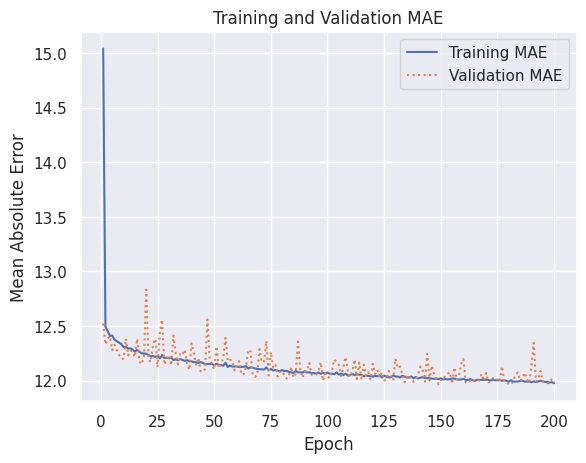

In [ ]:
from sklearn.model_selection import train_test_split
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

x_nn = df_nn.drop(['arrival_delay'], axis=1)
y_nn = df_nn['arrival_delay']
# Split the data into training and testing sets, with 80% for training and 20% for testing.
X_train_nn, X_test_nn, y_train_nn, y_test_nn = train_test_split(x_nn, y_nn, test_size=0.2, random_state=42)
# Fit the model to the training data, specifying validation split, epochs, and batch size.
hist = model.fit(X_train_nn, y_train_nn, validation_split=0.2, epochs=200, batch_size=256)
# Set the style of the plots using Seaborn.
sns.set()
# Extract the training and validation Mean Absolute Error (MAE) from the training history.
err = hist.history['mae']
val_err = hist.history['val_mae']
# Define the number of epochs.
epochs = range(1, len(err) + 1)
# Plot the Training MAE and Validation MAE over epochs.
plt.plot(epochs, err, '-', label='Training MAE')
plt.plot(epochs, val_err, ':', label='Validation MAE')
plt.title('Training and Validation MAE')
plt.xlabel('Epoch')
plt.ylabel('Mean Absolute Error')
plt.legend(loc='upper right')
plt.plot()
# Use the trained model to predict on the test data.
y_pred_nn = model.predict(X_test_nn)

In [ ]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# Evaluate the regression model
mae_nn = mean_absolute_error(y_test_nn, y_pred_nn)
mse_nn = mean_squared_error(y_test_nn, y_pred_nn)
r2_nn = r2_score(y_test_nn, y_pred_nn)

print("Mean Absolute Error (MAE):", mae_nn)
print("Mean Squared Error (MSE):", mse_nn)
print("R-squared (R2):", r2_nn)

Mean Absolute Error (MAE): 12.032549704264445
Mean Squared Error (MSE): 392.6768164506195
R-squared (R2): 0.989498266424216


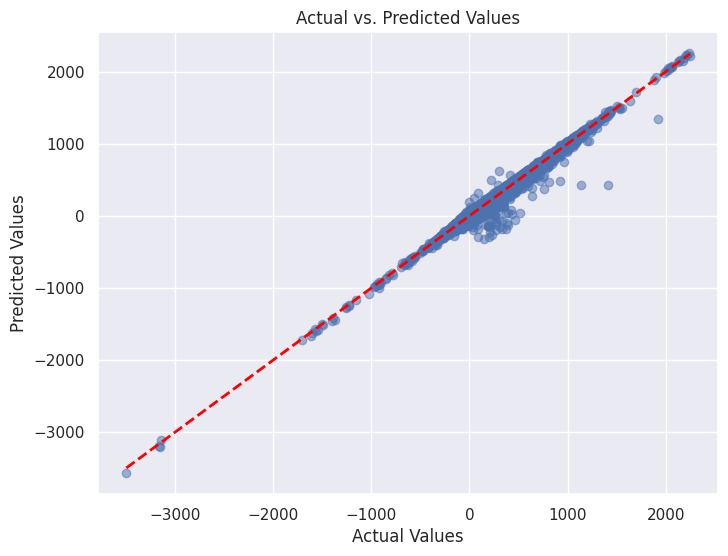

In [ ]:
import matplotlib.pyplot as plt

# y_test contains the actual target values for the test dataset
# y_pred contains the predicted values for the test dataset

# Create a scatter plot to visualize the relationship
plt.figure(figsize=(8, 6))
plt.scatter(y_test_nn, y_pred_nn, alpha=0.5)  # Plot actual vs. predicted values

# Add labels and title
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")

# Add a diagonal line for reference (perfect predictions)
plt.plot([min(y_test_nn), max(y_test_nn)], [min(y_test_nn), max(y_test_nn)], linestyle='--', color='red', lw=2)

# Show the plot
plt.show()

### Try loop for Neural Networks

In [ ]:

from sklearn.model_selection import train_test_split
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import pandas as pd
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import itertools
x_knn = df_knn.drop(['arrival_delay'], axis=1)
y_knn = df_knn['arrival_delay']
# Split the data into training and testing sets, with 80% for training and 20% for testing.
X_train_knn, X_test_knn, y_train_knn, y_test_knn = train_test_split(x_knn, y_knn, test_size=0.2, random_state=42)

# Define a list of possible dense layer sizes
dense_layer_sizes = [16, 32, 64, 128, 256]

# Define a list of possible activation functions
activation_functions = ['linear', 'sigmoid', 'tanh', 'relu', 'leaky_relu', 'elu']
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
# Initialize a list to store results
results = []

# Iterate through all combinations of dense layer sizes and activation functions
for dense_size, activation_func in itertools.product(dense_layer_sizes, activation_functions):
    model = Sequential()
    model.add(Dense(dense_size, activation=activation_func, input_dim=22))
    model.add(Dense(dense_size, activation=activation_func))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])
    model.fit(X_train_knn, y_train_knn, validation_split=0.2, epochs=200, batch_size=256, verbose=1, callbacks=[early_stopping])

    y_pred_knn = model.predict(X_test_knn)
    mae_knn = mean_absolute_error(y_test_knn, y_pred_knn)
    mse_knn = mean_squared_error(y_test_knn, y_pred_knn)
    r2_knn = r2_score(y_test_knn, y_pred_knn)

    # Store the results in the list
    results.append({'Dense Size': dense_size, 'Activation': activation_func, 'MAE': mae_knn, 'MSE': mse_knn, 'R2': r2_knn})

# Create a DataFrame from the results list
results_df = pd.DataFrame(results)

# Sort the DataFrame by MSE and MAE in ascending order
mse_sorted_df = results_df.sort_values(by='MSE', ascending=True)
mae_sorted_df = results_df.sort_values(by='MAE', ascending=True)

# Sort the DataFrame by R2 in descending order
r2_sorted_df = results_df.sort_values(by='R2', ascending=False)

# Display the sorted DataFrames
print("Sorted by MSE:")
print(mse_sorted_df)
print("="*50)

print("Sorted by MAE:")
print(mae_sorted_df)
print("="*50)

print("Sorted by R2:")
print(r2_sorted_df)

Epoch 1/200
1363/1363 [==============================] - 10s 3ms/step - loss: 530.3633 - mae: 14.6823 - val_loss: 365.3114 - val_mae: 12.4045
Epoch 2/200
1363/1363 [==============================] - 4s 3ms/step - loss: 381.9960 - mae: 12.7420 - val_loss: 378.1291 - val_mae: 12.6038
Epoch 3/200
1363/1363 [==============================] - 4s 3ms/step - loss: 382.8565 - mae: 12.7612 - val_loss: 369.1970 - val_mae: 12.9036
Epoch 4/200
1363/1363 [==============================] - 4s 3ms/step - loss: 382.8032 - mae: 12.7655 - val_loss: 366.9190 - val_mae: 12.4591
Epoch 5/200
1363/1363 [==============================] - 4s 3ms/step - loss: 381.9524 - mae: 12.7367 - val_loss: 365.0014 - val_mae: 12.5988
Epoch 6/200
1363/1363 [==============================] - 4s 3ms/step - loss: 380.9684 - mae: 12.7138 - val_loss: 366.3961 - val_mae: 12.4882
Epoch 7/200
1363/1363 [==============================] - 4s 3ms/step - loss: 381.7603 - mae: 12.7366 - val_loss: 382.5280 - val_mae: 13.5877
Epoch 8/200


### K-Nearest Neighbors

In [ ]:
#import libraries
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings("ignore", category=ConvergenceWarning)
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import accuracy_score, precision_score, recall_score,mean_absolute_error

df_KNN = df.iloc[:100000]

#Separate variables of the dataset
x_KNN = df_KNN.drop(['arrival_delay','Calendar_date','Month','route_id','bus_id','stop_sequence'], axis=1)
y_KNN = df_KNN['arrival_delay']

# Split the data into training and testing sets
x_train_KNN, x_test_KNN, y_train_KNN, y_test_KNN = train_test_split(x_KNN, y_KNN, test_size=0.2, random_state=0)

# Normalize the features
scaler = StandardScaler()
x_train_KNN_scaled = scaler.fit_transform(x_train_KNN)
x_test_KNN_scaled = scaler.transform(x_test_KNN)

#KNN
model_KNN=KNeighborsRegressor()
param_grid = {
'n_neighbors': [3, 5, 7, 9, 11, 13, 15],
'p': [1, 2], # 1 for Manhattan distance, 2 for Euclidean distance
'weights': ['uniform', 'distance']
}

# Initialize a GridSearchCV object to perform hyperparameter tuning
grid_search = GridSearchCV(estimator=model_KNN, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit the GridSearchCV object to the training data to perform hyperparameter tuning
grid_search.fit(x_train_KNN_scaled, y_train_KNN)

# Retrieve the best hyperparameters identified by the grid search
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Retrieve the best cross-validated negative mean squared error (MSE)
best_score = grid_search.best_score_
print("Best accuracy:", best_score)

# Set 'model_KNN' to be the best estimator (model with the best hyperparameters) identified by the grid search
model_KNN = grid_search.best_estimator_

# Predict on the test data
y_pred_KNN = model_KNN.predict(x_test_KNN_scaled)

# Evaluate the regression model
mae = mean_absolute_error(y_test_KNN, y_pred_KNN)
mse = mean_squared_error(y_test_KNN, y_pred_KNN)
r2 = r2_score(y_test_KNN, y_pred_KNN)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("R-squared (R2):", r2)

Best Hyperparameters: {'n_neighbors': 5, 'p': 2, 'weights': 'distance'}
Best accuracy: -1297.6107389186932
Mean Absolute Error (MAE): 24.53827941402538
Mean Squared Error (MSE): 1238.4304008244385
R-squared (R2): 0.9425381021522732


### Gaussian Process Regression

In [ ]:
# Import libraries
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C, WhiteKernel
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Load dataset
df_GR = df.iloc[:10000] #It took 2 h and 43 min 4 s to calculate with this dataset

#Separate variables of the dataset
x_GPR = df_GR.drop(['arrival_delay','Calendar_date','Month'], axis=1)
y_GPR = df_GR['arrival_delay']

# Split the data into training and testing sets
x_train_GPR, x_test_GPR, y_train_GPR, y_test_GPR = train_test_split(x_GPR, y_GPR, test_size=0.2, random_state=0)

# Define the GPR model with kernel and other hyperparameters
kernel = C(1.0, (1e-3, 1e3)) * RBF(1.0, (1e-2, 1e2)) + WhiteKernel(noise_level=1e-5)
model_GPR = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10, random_state=0)

# Fit the Gaussian Process Regressor to the training data
model_GPR.fit(x_train_GPR, y_train_GPR)

# Predict bus arrival delay on the test data
y_pred_GPR, sigma = model_GPR.predict(x_test_GPR, return_std=True)

# Evaluate the regression model using metrics
mae = mean_absolute_error(y_test_GPR, y_pred_GPR)
mse = mean_squared_error(y_test_GPR, y_pred_GPR)
r2 = r2_score(y_test_GPR, y_pred_GPR)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("R-squared (R2):", r2)

/usr/local/lib/python3.10/dist-packages/sklearn/gaussian_process/kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__k1__constant_value is close to the specified upper bound 1000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/gaussian_process/kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__k2__length_scale is close to the specified upper bound 100.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(


Mean Absolute Error (MAE): 18.070251371982383
Mean Squared Error (MSE): 861.9195596938988
R-squared (R2): 0.951288911516105


### Bayesian Regression:

In [ ]:
# Import libraries
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import BayesianRidge
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np

# Load dataset
#df_BR= df.iloc[:100000]

#Separate variables of the dataset
x_BR = df.drop(['arrival_delay','Calendar_date','Month','route_id','bus_id','stop_sequence'], axis=1)
y_BR = df['arrival_delay']

# Split the data into training and testing sets
x_train_BR, x_test_BR, y_train_BR, y_test_BR = train_test_split(x_BR, y_BR, test_size=0.2, random_state=0)

# Normalize the features
scaler = StandardScaler()
x_train_BR_scaled = scaler.fit_transform(x_train_BR)
x_test_BR_scaled = scaler.transform(x_test_BR)

# Define the Bayesian Linear Regression model
model_BR = BayesianRidge()

# Fit the Bayesian Linear Regression model to the training data
model_BR.fit(x_train_BR_scaled, y_train_BR)

# Predict bus arrival delay on the test data
y_pred_BR = model_BR.predict(x_test_BR_scaled)

# Evaluate the Bayesian Linear Regression model using metrics
mae = mean_absolute_error(y_test_BR, y_pred_BR)
mse = mean_squared_error(y_test_BR, y_pred_BR)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_BR, y_pred_BR)

def mean_absolute_percentage_error(y_true, y_pred):
    mask = y_true != 0  # Create a mask where y_true is not zero
    y_true = y_true[mask]
    y_pred = y_pred[mask]
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100 if len(y_true) > 0 else 0  # Check if there are non-zero values in y_true

mape = mean_absolute_percentage_error(y_test_BR, y_pred_BR)

print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R-squared: {r2}")
print(f"Mean Absolute Percentage Error: {mape}%")

Mean Absolute Error: 12.609225980153369
Mean Squared Error: 390.3756449951427
Root Mean Squared Error: 19.75792613092636
R-squared: 0.9896197819099795
Mean Absolute Percentage Error: 42.44038053997366%


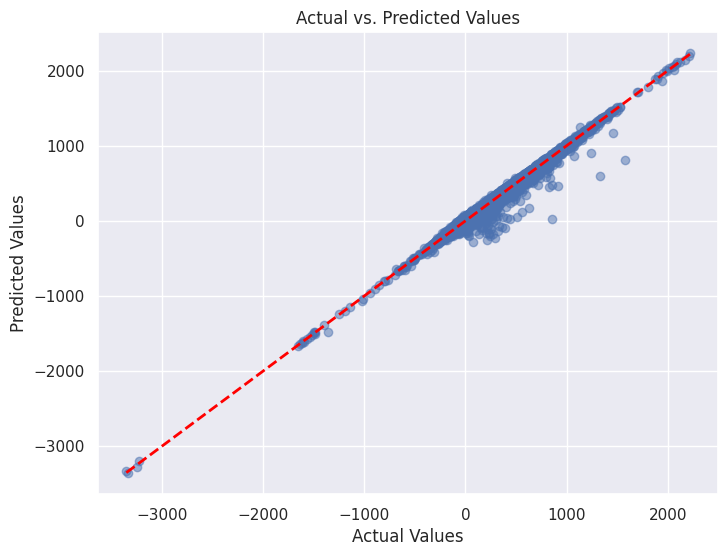

In [ ]:
import matplotlib.pyplot as plt

# y_test contains the actual target values for the test dataset
# y_pred contains the predicted values for the test dataset

# Create a scatter plot to visualize the relationship
plt.figure(figsize=(8, 6))
plt.scatter(y_test_BR, y_pred_BR, alpha=0.5)  # Plot actual vs. predicted values

# Add labels and title
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")

# Add a diagonal line for reference (perfect predictions)
plt.plot([min(y_test_BR), max(y_test_BR)], [min(y_test_BR), max(y_test_BR)], linestyle='--', color='red', lw=2)

# Show the plot
plt.show()

##Save best model

In [ ]:
from tensorflow.keras.models import load_model

model.save("best_model_group6_Daniel_Tong.h5")

from google.colab import files

files.download("best_model_group6_Daniel_Tong.h5")